In [52]:
import numpy as np
from sympy import *
from scipy.stats import *
import pandas as pd

$H0: mu1 = mu2 = ... = mn\\
H1: \exists i,j : mu_i \not\equiv mu_j, i\not\equiv j$\
в предположении, что дисперсии равны

In [2]:
def F_three_sample_test(A, B, C, alpha):
    n1, n2, n3 = len(A), len(B), len(C)
    n = n1+n2+n3
    k = 3
    amean, bmean, cmean = A.mean(), B.mean(), C.mean()
    Sa, Sb, Sc = np.var(A, ddof=True), np.var(B, ddof=True), np.var(C, ddof=True) # ипр. выб. ДИСПЕРСИЯ
    avar, bvar, cvar = np.var(A), np.var(B), np.var(C)

    Xm = 1/n*(sum(A)+sum(B)+sum(C)) # выборочное среднее в объед.выборке
    Var = 1/n*(avar*n1+bvar*n2+cvar*n3) # средняя выб.дисперсия
    
    SSE = n*Var # внутригрупповая сумма квадратов (=n*(ср.выб.дисп.))
    MSE = SSE/(n-k) # остаточная дисперсия (несмещен.)
    delt = 1/n*((amean - Xm)**2*n1 + (bmean - Xm)**2*n2 + (cmean - Xm)**2*n3) # межгрупп.дисперсия
    SSTR = n*delt # межгрупповая сумма квадратов
    MSTR = SSTR/(k-1) # факторная дисперсия
    
    F_st = MSTR/MSE
    F = f(k-1, n-k)
    cv = F.isf(alpha)
    pv = F.sf(F_st)
    
    return F_st, cv, pv, Var

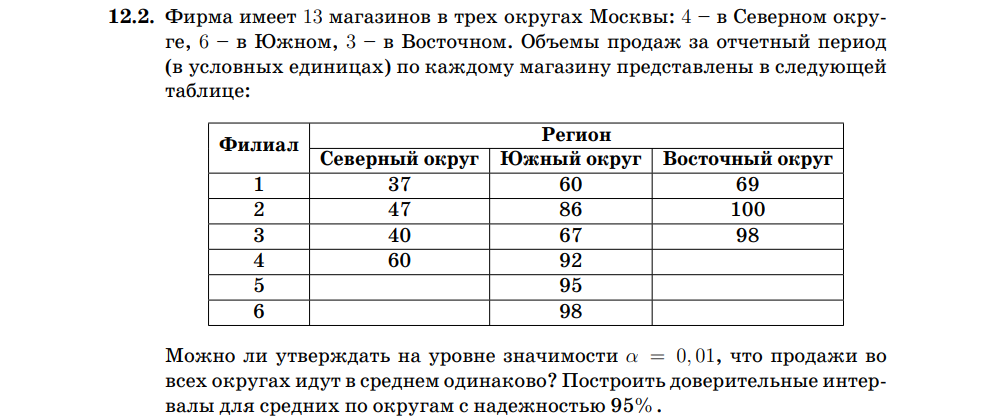

In [3]:
n1, n2, n3 = 4,6,3
n = n1+n2+n3
k = 3
T = t(n-k)
north, south,east = np.array([37, 47, 40, 60]), np.array([60,86,67,92,95,98]), np.array([69,100,98])
MSE = 1/(n-k)*(north.var()*n1+south.var()*n2+east.var()*n3)
alpha1 = 0.01
alpha2 = 1 - 0.95

In [4]:
F_three_sample_test(north, south, east, alpha1)

(9.916666666666666,
 7.559432157547899,
 0.0042314683517178575,
 166.15384615384616)

In [5]:
teta11 = north.mean() - T.isf(alpha2/2)*(MSE/n1)**.5
teta12 = north.mean() + T.isf(alpha2/2)*(MSE/n1)**.5
teta11, teta12

(29.62659020984559, 62.37340979015441)

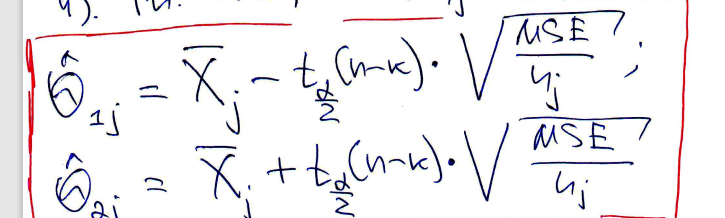

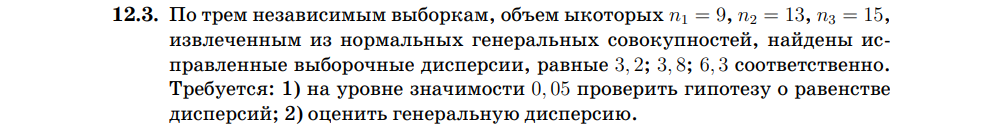

In [56]:
n1, n2, n3 = 9, 13, 15
k = 3
n = n1+n2+n3
nu1, nu2, nu3 = n1-1, n2-1, n3-1
N = nu1 + nu2 + nu3
S1, S2, S3 = 3.2, 3.8, 6.3
alpha = 0.05
S = 1/N*(nu1*S1 + nu2*S2 + nu3*S3)
M = N*ln(S) - (nu1*S1 + nu2*S2 + nu3*S3)
g = 1 + 1/(3*(k-1))*((1/nu1 + 1/nu2 + 1/nu3)-1/N)
chiB_st = M/g

chiB_st, cv
N

34

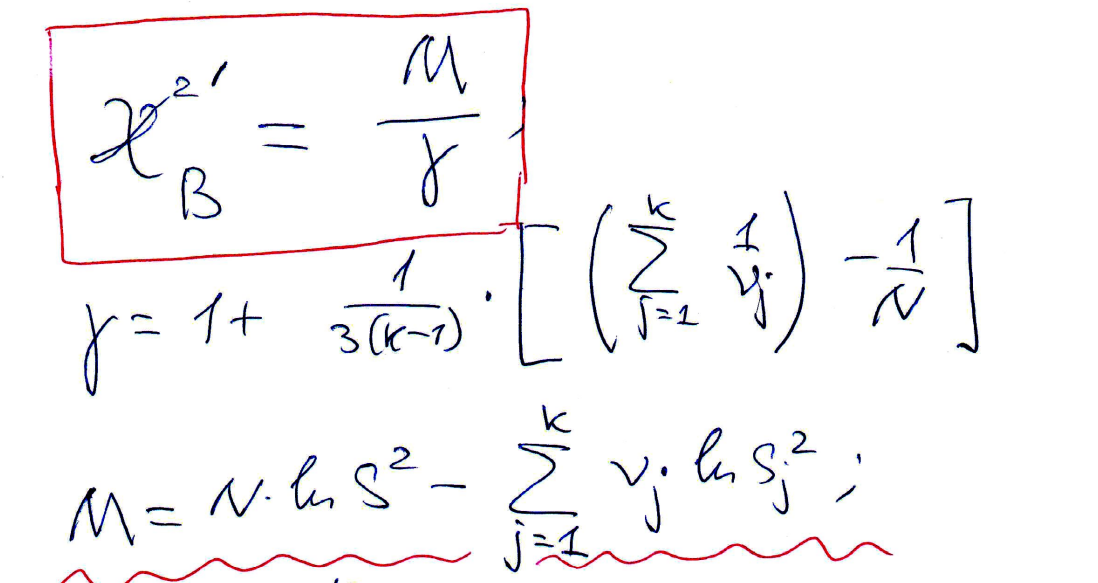

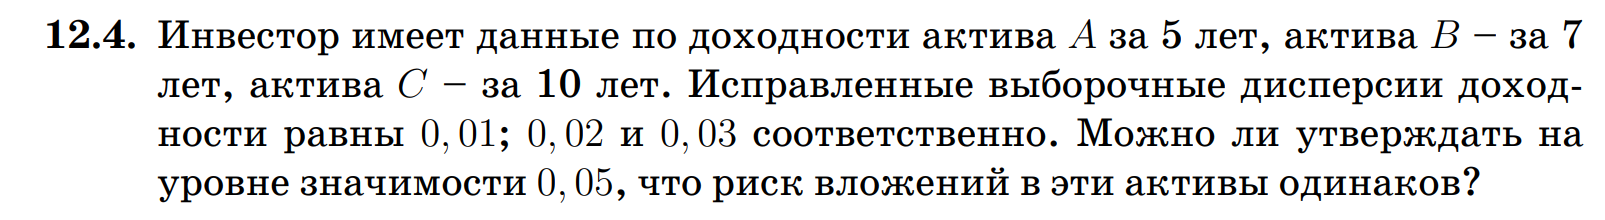

In [48]:
n_i = [5, 7, 10]
n = sum(n_i)
S_i = [0.01, 0.02, 0.03]
alpha = 0.05
k = 3

nu_i = [ni - 1 for ni in n_i]
N = sum(n_i)
S = 1/N*sum(n_i[i]*S_i[i] for i in range(3))
M = N*ln(S) - sum(n_i[i]*ln(S_i[i]) for i in range(3))
gam = 1 + 1/(3*(k-1))*(sum(1/x for x in nu_i) - 1/N)
chiB = M/gam
chi = chi2(k-1)
chiB

1.64659431829587

In [50]:
cv = chi.isf(alpha)
cv

5.991464547107983

In [51]:
pv = chi.sf(float(chiB))
pv

0.4389818726414867

In [ ]:
c